# Exercises week 3 part 2: Convolutions

IN3310 / IN4310 - Machine Learning for Image Analysis

---

### Task 1: Convolution by hand

You are given an input image (x), kernel (w) and bias (b). Your task is to evaluate the shaded pixel in the image after the convolution. The origin of the kernel is the shaded pixel. Use zero padding and do not rotate the kernel (so the value you compute is technically the cross-correlation result at this pixel location).

<img src="images/x_w_b.png" alt="Drawing" style="width: 600px;"/>

---

### Task 2: Implement function for convolution

You shall implement a general function that convolves an image of $M$x$N$ pixels and $C$ channels ($C=3$ for an RGB image) with a filter kernel of size $M_k$x$N_k$. Apply the filter independently to all $C$ channels of the image.

To compute the convolution result at location $[i,j,c]$, centre the filter kernel at location $[i,j,c]$ and multiply channel $c$ of the image and the filter at all locations where the filter overlaps with the image, and then sum the products. You shall first use 2 for-loops to compute this sum, and then use NumPy to compute it.

To compute the convolution result of all pixels, you need to loop over all the pixel positions and channels, in this case three for loops over image height $M$, width $N$ and channels $C$.

In this example, you shall compute the convolution only at those pixels where the filter kernel fits inside the image.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import imageio
import time

plt.rcParams['figure.figsize'] = (14.0, 12.0)

In [3]:
def convolution_loops(image, kernel):
  """
  Convolves a MxNxC image with a MkxNk kernel.
  """
  out = np.zeros(image.shape)
  
  kernel = np.rot90(kernel, 2) # rotate 180 degrees to perform convolution (not correlation)
  
  #raise NotImplementedError('Perform the convolution by looping over the filter kernel in addition to the 3 outer loops, and store the result in \'out\'.')

  M,N, C = image.shape     #Image Dimensions
  Mk,Nk = kernel.shape    #Kernel Dimensions

  M_valid = M - Mk + 1
  N_valid = N - Nk + 1


  for i in range(M_valid):
    for j in range(N_valid):
      for c in range(C):
        for m in range(Mk):
          for n in range(Nk):
            out[i,j,c] += image[i+m,j+n,c] * kernel[m,n]
 
  return out
  
 

  

You shall now implement a function that performs the same convolution, but instead of looping over the filter kernel, it should use either np.sum or np.dot. In the latter case, you should reshape the current subwindow and the filter into 1D vectors of length $N_k \cdot M_k$ before using np.dot.

In [4]:

def convolution(image, kernel):
  """
  Convolves a MxNxC image with a MkxNk kernel.
  """
  out = np.zeros(image.shape)
  
  kernel = np.rot90(kernel, 2) # rotate 180 degrees to perform true convolution (not correlation)

  M,N,C = image.shape     #Image Dimensions
  Mk,Nk = kernel.shape    #Kernel Dimensions
  
  #raise NotImplementedError('Perform the convolution by using np.sum or np.dot inside the 3 for-loops, and store the result in \'out\'.')
  #valid or reduced output size: filter fits inside image
  M_valid = M - Mk + 1  
  N_valid = N - Nk + 1  


# Only process the valid regions
  for i in range(M_valid):
      for j in range(N_valid):
          for c in range(C):
            # Extract the image patch and compute convolution
            patch = image[i:i+Mk,j:j+Nk, c]
            out[i,j,c] = np.sum(patch * kernel)
  return out

In [5]:
# Check that your implementations provide the same result for a small 2D image.
f1 = np.arange(4)
f2 = np.arange(5)
f = f1[:, np.newaxis, np.newaxis] + f2[np.newaxis, :, np.newaxis]
#print(f[:,:,0])
print(f.shape)

h = np.arange(9).reshape(3, 3)
#print(h)
#print(h.shape)

out1 = convolution_loops(f, h)
print(out1[:,:,0])

out2 = convolution(f, h)
print(out2[:,:,0])

(4, 5, 1)
[[ 48.  84. 120.   0.   0.]
 [ 84. 120. 156.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]
[[ 48.  84. 120.   0.   0.]
 [ 84. 120. 156.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]]


Calculation time with inner loops: 16.79593777656555 sec
Calculation time without inner loops: 4.704158782958984 sec


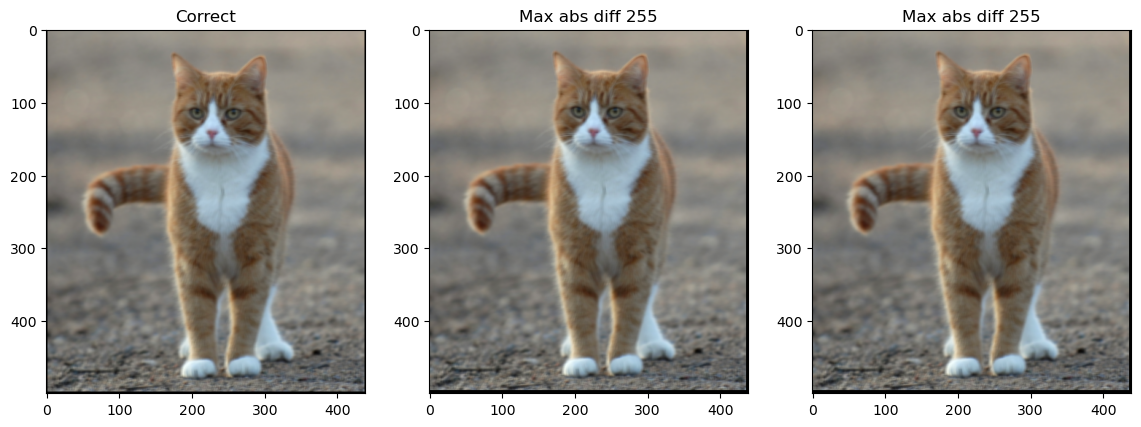

In [14]:
import imageio.v2 as imageio
 
# Check that your implementations filter an image correctly.
img = imageio.imread('images/cat.png').astype(np.float64)

kernel = np.arange(25).reshape((5, 5))

start = time.time()
out1 = convolution_loops(img, kernel)
print('Calculation time with inner loops:', time.time()-start, 'sec')

start= time.time()
out2 = convolution(img, kernel)
print('Calculation time without inner loops:', time.time()-start, 'sec')

out1 -= out1.min()
out1 /= out1.max()
out1 *= 255
out1 = out1.astype(np.uint8)

out2 -= out2.min()
out2 /= out2.max()
out2 *= 255
out2 = out2.astype(np.uint8)

correct = imageio.imread('images/convolution_cat.png')

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(correct)
plt.title('Correct')
plt.subplot(1, 3, 2)
plt.imshow(out1)
plt.title('Max abs diff {}'.format(np.max(np.abs(correct-out1))))
plt.subplot(1, 3, 3)
plt.imshow(out2)
plt.title('Max abs diff {}'.format(np.max(np.abs(correct-out2))))
plt.show()

---

### Task 3: Implement blurring function

You shall implement a function that use your convolution function to filter an image with an average filter (box filter) with kernel size of 11. The filter should have coefficients 1/(k_size*k_size)

In [19]:
def blur_filter(img):
  """
  Blurs a MxNxC image with an average filter (box filter) with kernel size of 11.
  The box filter (average filter) should sum to 1, 
  so normalizing the kernel beforehand ensures the convolution doesn't amplify the image intensity.
  """
  #raise NotImplementedError('Perform the blurring and return the blurred image.')
  k_size= 11
  kernel = np.ones((k_size,k_size))/(k_size*k_size) #Normalize the kernel 
  out = convolution(img, kernel)
  return out

1.0
Calculation time: 6.6046178340911865 sec
(500, 439, 3)


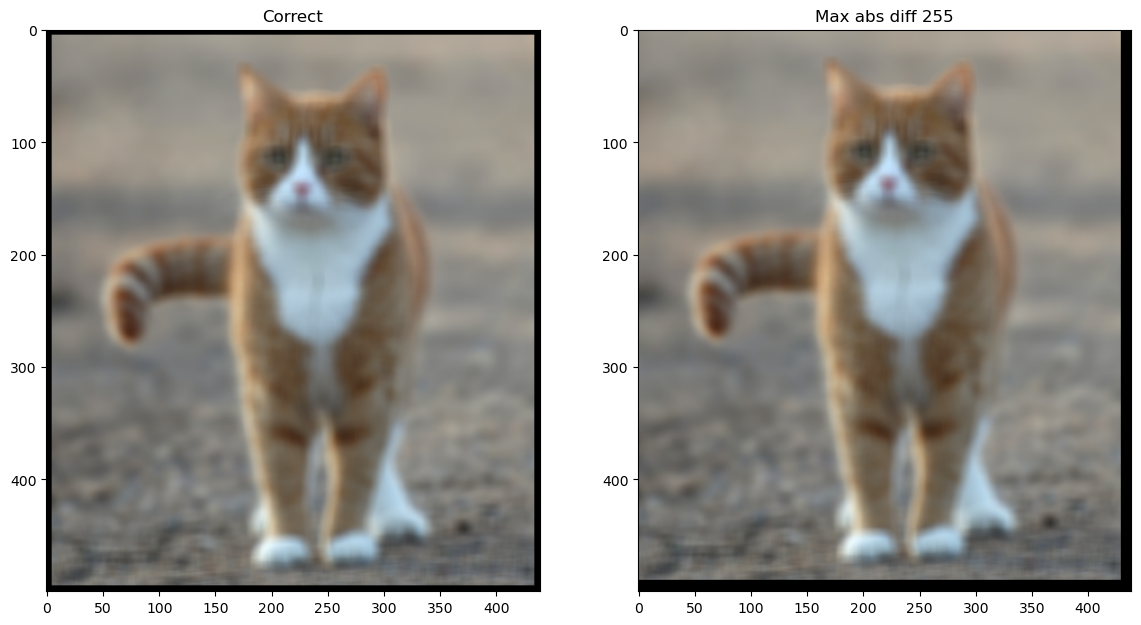

In [ ]:
# Check that your blurring implementation is correct.
img = imageio.imread('images/cat.png').astype(np.float64)

start = time.time()
out = blur_filter(img)
print('Calculation time:', time.time()-start, 'sec')

out -= out.min()
out /= out.max()
out *= 255
out = out.astype(np.uint8)

correct = imageio.imread('images/blur_cat.png')
#print("Mean absolute difference:", np.mean(np.abs(correct - out)))
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(correct)
plt.title('Correct')
plt.subplot(1, 2, 2)
plt.imshow(out)
plt.title('Max abs diff {}'.format(np.max(np.abs(correct-out))))
plt.show()

---

### Task 4: Implement gradient magnitude function

You shall implement a function that use your convolution function to filter an image with each Sobel kernel and then computes the gradient magnitude image. If the input image has multiple channels, then compute the gradient magnitude of each channel and take the maximum at each pixel location.

In [ ]:
def gradient_magnitude(img):
  """
  Computes the gradient magnitude of a MxNxC image using the Sobel kernels.
  """
  sobel_y = np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2, -1]])
  sobel_x = np.array([[1, 0, -1 ],
                      [2, 0, -2],
                      [1, 0, -1]])
  
  #Include the channel dimension in the output, except from the last one. Therefore img.shape[:-1] is used.
  out = np.zeros(img.shape[:-1])
  
  #1:raise NotImplementedError('Use your convolution function to compute the numerical partial derivatives using the Sobel kernels.')
  #2:raise NotImplementedError('Use the numerical partial derivatives to compute the gradient magnitude of each channel of the input image.')
  #3:raise NotImplementedError('Return the image which at each pixel location contains the maximum gradient magnitude of all channels.')

  #1 
  gx = convolution(img, sobel_x)
  gy = convolution(img, sobel_y)
  #2
  for c in range(img.shape[-1]):      #loop over channe.
    channel_magnitude = np.sqrt(gx[:,:,c]**2 + gy[:,:,c]**2)
  #3
    out = np.maximum(out,channel_magnitude)
  
  return out

    




Calculation time: 11.681625127792358 sec


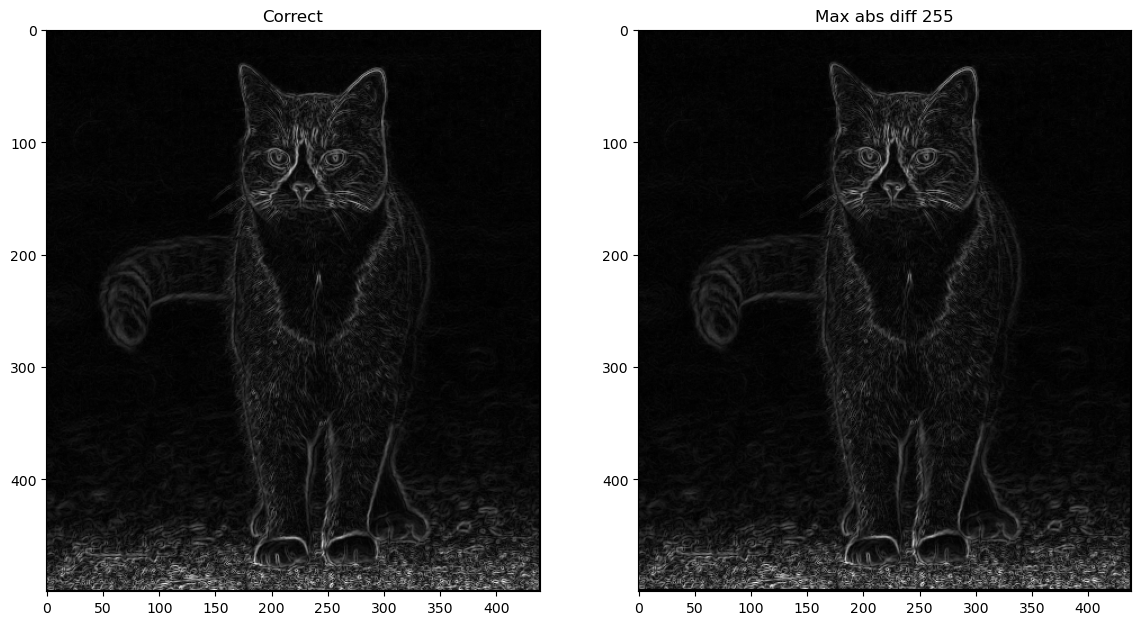

In [40]:
# Check that your gradient magnitude implementation is correct.
img = imageio.imread('images/cat.png').astype(np.float64)

start = time.time()
out = gradient_magnitude(img)
print('Calculation time:', time.time()-start, 'sec')

out -= out.min()
out /= out.max()
out *= 255
out = out.astype(np.uint8)

correct = imageio.imread('images/sobel_cat.png')
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(correct, cmap='gray')
plt.title('Correct')
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.title('Max abs diff {}'.format(np.max(np.abs(correct-out))))
plt.show()

---

### Task 5: Implement gradient magnitude function using PyTorch

You shall now implement a function that performs the same gradient magnitude computation, but instead of using your convolution function, it should use \"F.conv2d\" (\"torch.nn.functional\" is imported as \"F\").

The formats of the inputs to \"F.conv2d\" are designed to be suitable for use in convolutional neural networks (although we would often call \"torch.nn.Conv2d\" in a \"torch.nn.Module\" class). The function therefore by default expects filters with a number of channel equal to the number of channels in the input image. To obtain a convolution result per channel of the input image, you should implement depthwise convolution, which you could do by specifying the "group" option of \"F.conv2d\" to the number of channels. Since we should be convolving all channels with the same filters, the Sobel kernels are in the code below repeated along the channel dimension to match the number of channels in the input image.

By default \"F.conv2d\" does not pad and only computes the convolution result at pixels where the filter kernels fit inside the image. Do not change this default behaviour. The code below will zero-pad your convolution result with 1 pixel on both sides, which will make its output directly comparable to the output of your convolution function. (If instead using \"F.conv2d\" to pad, then we will get some non-zero values at the border of the convolution result, which makes sense in general, but you should not do it here because you were not asked to do it in your Python/NumPy convolution function.)

In [55]:
import torch
import torch.nn as nn
import torch.nn.functional as F

def gradient_magnitude_torch(img):
  """
  Computes the gradient magnitude of a MxNxC image using the Sobel kernels.
  """
  device = torch.device('cpu')
  channels = img.shape[2]
  img_torch = torch.as_tensor(img, device=device).permute(2,0,1).unsqueeze(0)
  sobel_y = torch.as_tensor([[1, 2, 1],
                             [0, 0, 0],
                            [-1, -2, -1]], dtype=torch.float64)
  sobel_y = torch.rot90(sobel_y, 2).unsqueeze(0).unsqueeze(0).repeat(channels, 1, 1, 1)
  sobel_x = torch.as_tensor([[1, 0, -1 ],
                             [2, 0, -2],
                             [1, 0, -1]], dtype=torch.float64)
  sobel_x = torch.rot90(sobel_x, 2).unsqueeze(0).unsqueeze(0).repeat(channels, 1, 1, 1)
  #1:raise NotImplementedError('Use \'F.conv2d\' to compute the numerical partial derivatives using the Sobel kernels.')
  #2:raise NotImplementedError('Use the numerical partial derivatives to compute the gradient magnitude of each channel of the input image.')
  #3:raise NotImplementedError('Update \'img_torch\' to be the image which at each pixel location contains the maximum gradient magnitude of all channels.')
  
  #1
  gx = F.conv2d(img_torch, sobel_x, groups=channels)
  gy = F.conv2d(img_torch, sobel_y, groups=channels)
  #2
  gradient_magnitude = torch.sqrt(gx**2 + gy**2)
  #3
  img_torch = torch.max(gradient_magnitude, dim=1)[0]
  
  m = nn.ZeroPad2d(1)
  return m(img_torch.squeeze()).cpu().data.numpy()

Calculation time: 0.0855400562286377 sec


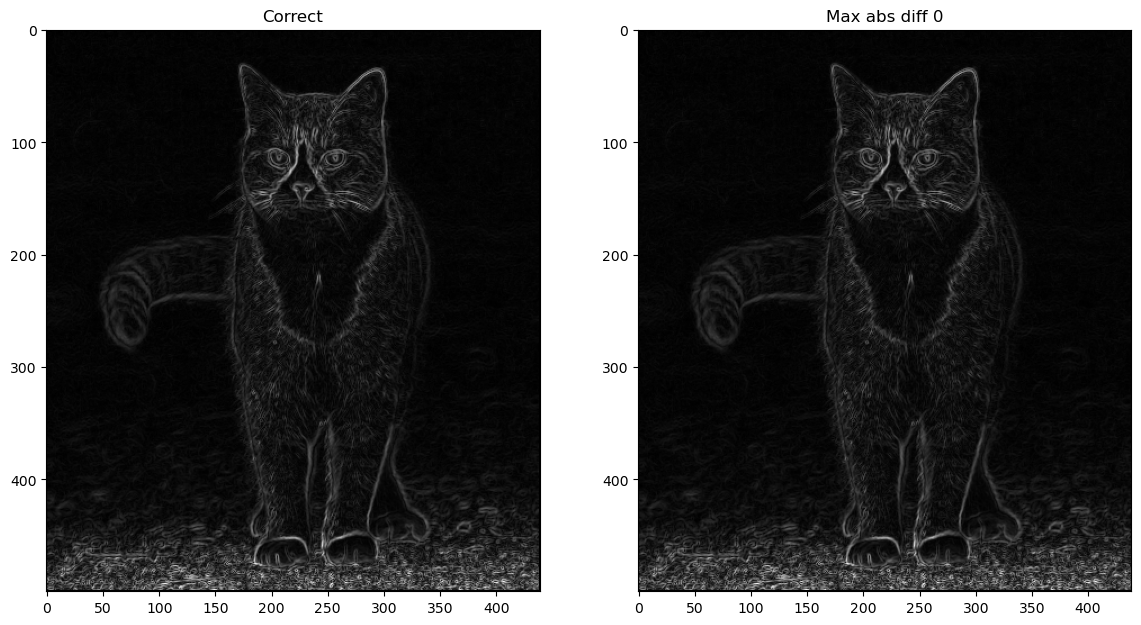

In [56]:
# Check that your gradient magnitude implementation is correct.
img = imageio.imread('images/cat.png').astype(np.float64)

start = time.time()
out = gradient_magnitude_torch(img)
print('Calculation time:', time.time()-start, 'sec')

out -= out.min()
out /= out.max()
out *= 255
out = out.astype(np.uint8)

correct = imageio.imread('images/sobel_cat.png')
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(correct, cmap='gray')
plt.title('Correct')
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray')
plt.title('Max abs diff {}'.format(np.max(np.abs(correct-out))))
plt.show()